Dataset name: Stanford Sentiment Treebank (SST-2)
Dataset link:https://huggingface.co/datasets/stanfordnlp/sst2/tree/main/data
Different from what I expected in my proposal, the SST-2 dataset used here is a simplified version with 3 emotion classes (negative -1, neutral 0, positive 1) instead of 5 to accelerate training.

In [ ]:
import pandas as pd
from pandas import read_parquet
import numpy as np
import transformers


In [ ]:
from transformers import pipeline

In [ ]:
from sklearn import datasets
from sklearn.svm import SVC
from sklearn.feature_extraction.text import CountVectorizer

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
from sklearn.pipeline import Pipeline

In [ ]:
from sklearn.decomposition import PCA

In [ ]:
# RE Library for Regular Expression
import re

# NLTK Library for Natural Language Processing
import nltk
nltk.download('stopwords') # Downloading the Stopwords

# Stopwords for removing stopwords in the Text
from nltk.corpus import stopwords

# PorterStemmer for Stemming the Words
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import time

In [ ]:
train_data = read_parquet("train.parquet")
print(train_data.count())
train_data.head()

idx         67349
sentence    67349
label       67349
dtype: int64


,idx,sentence,label
0,0,hide new secretions from the parental units,0
1,1,"contains no wit , only labored gags",0
2,2,that loves its characters and communicates som...,1
3,3,remains utterly satisfied to remain the same t...,0
4,4,on the worst revenge-of-the-nerds clichés the ...,0


In [ ]:
val_data = read_parquet("validation.parquet")
print(val_data.count())
val_data.head()

idx         872
sentence    872
label       872
dtype: int64


,idx,sentence,label
0,0,it 's a charming and often affecting journey .,1
1,1,unflinchingly bleak and desperate,0
2,2,allows us to hope that nolan is poised to emba...,1
3,3,"the acting , costumes , music , cinematography...",1
4,4,"it 's slow -- very , very slow .",0


In [ ]:
test_data = read_parquet("test.parquet")
print(test_data.count())
test_data.head()

idx         1821
sentence    1821
label       1821
dtype: int64


,idx,sentence,label
0,0,uneasy mishmash of styles and genres .,-1
1,1,this film 's relationship to actual tension is...,-1
2,2,"by the end of no such thing the audience , lik...",-1
3,3,director rob marshall went out gunning to make...,-1
4,4,lathan and diggs have considerable personal ch...,-1


In [ ]:
data_list = [train_data, test_data, val_data]
data = pd.concat(data_list, ignore_index=True)


<Axes: xlabel='label'>

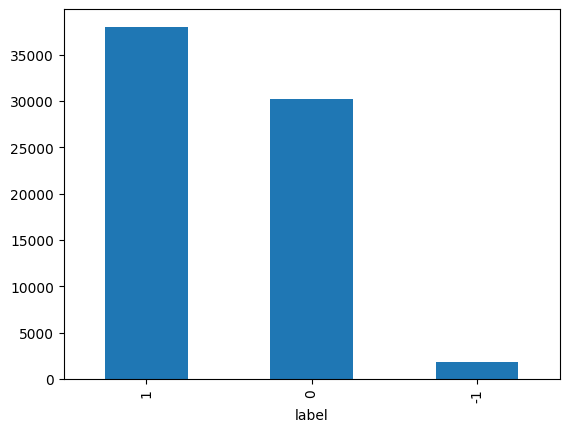

In [ ]:
data['label'].value_counts().plot(kind='bar')

In [ ]:
shuffled_df = data.sample(frac=1, random_state=42).reset_index(drop=True)
train_data = shuffled_df[0:67349]
val_data = shuffled_df[67349:67349+872]
test_data = shuffled_df[-1821:]
#keep original length after shuffled
data_list = [train_data, test_data, val_data]

In [ ]:
Y_train = train_data['label']
Y_train = np.array(Y_train)
print(Y_train.shape)

(67349,)


In [ ]:
Y_val = np.array(val_data['label'])

In [ ]:
Y_test = np.array(test_data['label'])

In [ ]:
test_data.head()

,idx,sentence,label
68221,5542,"not-so-funny gags ,",0
68222,24022,holes and completely lacking in chills,0
68223,23177,chicago make the transition from stage to scre...,1
68224,6548,i hate the feeling of having been slimed in th...,0
68225,63037,a love story and,1


In [ ]:
classifier = pipeline("text-classification", model="j-hartmann/emotion-english-distilroberta-base", return_all_scores=True)
classifier("I love this!")

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/1.00k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/329M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/294 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/798k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/text_classification.py:106: UserWarning: `return_all_scores` is now deprecated,  if want a similar functionality use `top_k=None` instead of `return_all_scores=True` or `top_k=1` instead of `return_all_scores=False`.
  warnings.warn(


[[{'label': 'anger', 'score': 0.004419785924255848},
  {'label': 'disgust', 'score': 0.001611992483958602},
  {'label': 'fear', 'score': 0.0004138524236623198},
  {'label': 'joy', 'score': 0.9771687984466553},
  {'label': 'neutral', 'score': 0.005764591973274946},
  {'label': 'sadness', 'score': 0.002092393347993493},
  {'label': 'surprise', 'score': 0.008528684265911579}]]

In [ ]:
eg2 = classifier("I hate this!")

In [ ]:
eg2[0]

[{'label': 'anger', 'score': 0.6189560294151306},
 {'label': 'disgust', 'score': 0.3279283344745636},
 {'label': 'fear', 'score': 0.004268054384738207},
 {'label': 'joy', 'score': 0.002641692291945219},
 {'label': 'neutral', 'score': 0.014557055197656155},
 {'label': 'sadness', 'score': 0.025817176327109337},
 {'label': 'surprise', 'score': 0.005831675138324499}]

In [ ]:
#label_to_value = {'anger':-1, 'fear':-1, 'joy':1, 'surprise':1, 'sadness':-1, 'disgust':-1, 'neutral':0}
label_to_value = [-1,-1,-1,1,0,-1,1]
def dist_bert(text):
  classifier_item = classifier(text)[0]
  max_score = 0
  for i in range(len(classifier_item)):
    if classifier_item[i]['score'] > max_score:
      max_score = classifier_item[i]['score']
      label_class = label_to_value[i]
  return label_class


In [ ]:
start = time.time()
pred_label = []  # Initializes with None or NaN
for i in range(test_data.shape[0]):
  pred_label.append(dist_bert(test_data.iloc[i]['sentence']))
end = time.time()
print(end-start,"s")
#runtime: 1m42s

102.8743908405304 s


In [ ]:
test_data['pred_label'] = pred_label

<ipython-input-36-4b7b5872e2a7>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_label'] = pred_label


In [ ]:
accuracy = (test_data['pred_label'] == test_data['label']).mean()
print(accuracy)

0.2954420647995607


In [ ]:
test_data

,idx,sentence,label,pred_label
68221,5542,"not-so-funny gags ,",0,1
68222,24022,holes and completely lacking in chills,0,-1
68223,23177,chicago make the transition from stage to scre...,1,-1
68224,6548,i hate the feeling of having been slimed in th...,0,-1
68225,63037,a love story and,1,1
...,...,...,...,...
70037,37194,its provocative conclusion,1,-1
70038,6265,an action film disguised as a war tribute is d...,0,-1
70039,54886,goes to absurd lengths to duck the very issues...,0,-1
70040,860,a perfect performance,1,1


Surprisingly, the accuracy using pretrained DistilBert Model is very low. It might be due to the short length of review sentences or the ambiguous word usage. Therefore, the model needs further training, and my combination of basic models has an advantage in conveniency.

NLP techniques I apply include textcleaning, tokenization (splitting words), stopword removal and stemming.

In [ ]:
important_words = {'no','not','only','few','most','more','nor','just',"don't"}

In [ ]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [ ]:
stopwords.words('english')[144:]

['aren',
 "aren't",
 'couldn',
 "couldn't",
 'didn',
 "didn't",
 'doesn',
 "doesn't",
 'hadn',
 "hadn't",
 'hasn',
 "hasn't",
 'haven',
 "haven't",
 'isn',
 "isn't",
 'ma',
 'mightn',
 "mightn't",
 'mustn',
 "mustn't",
 'needn',
 "needn't",
 'shan',
 "shan't",
 'shouldn',
 "shouldn't",
 'wasn',
 "wasn't",
 'weren',
 "weren't",
 'won',
 "won't",
 'wouldn',
 "wouldn't"]

In [ ]:
mod_stopwords = set(stopwords.words('english')[:144])
mod_stopwords = (mod_stopwords - important_words) | {'would','could','us','one'}

In [ ]:
ps = PorterStemmer()
corpus = [None,None,None]
for i in range(len(data_list)):
    data_item = data_list[i]
    corpus_item = []
    for j in range(0, len(data_item)):
        review = re.sub('[^a-zA-Z]', ' ', data_item.iloc[j]['sentence']) #textcleaning
        review = review.split() #tokenization
        review = [ps.stem(word) for word in review if not word in mod_stopwords]
        review = ' '.join(review)
        corpus_item.append(review)
    corpus[i] = corpus_item

# Printing the first 5 values in the corpus list
corpus[0][1:6]


['subzero version',
 'sheer beauti imag',
 'f rom perform cinematographi outstand soundtrack unconvent narr film blazingli aliv admir mani level',
 'monotoni',
 'intox show']

To extract features, I plan to combine Word2Vec and N-Gram to generate feature maps that will serve as input to multiple classifiers.

In [ ]:

pred_label2 = []
for sentence in corpus[1]:
  pred_label2.append(dist_bert(sentence))
test_data['pred_label2'] = pred_label2

<ipython-input-47-07be178ad648>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['pred_label2'] = pred_label2


In [ ]:
accuracy2 = (test_data['pred_label2'] == test_data['label']).mean()
print(accuracy)
#After preprocessing sentences, performance of model does not change, meaning the only way for better prediction is model training.

0.2954420647995607
